In [1]:
#%% Libraries
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.utils import resample
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV as RFECV_SKYLEARN
pd.options.display.max_columns = 100
#pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [2]:
#Open File
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
# Order categories
categories = pd.Categorical(albert['target'], categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels

['med', 'med', 'med', 'med', 'med', ..., 'high', 'high', 'high', 'high', 'high']
Length: 10000
Categories (3, object): ['low' < 'med' < 'high']

In [39]:
#%% Model
from pycaret.classification import *
clf1 = setup(data = albert, target = 'target'
             , silent = True
             , log_experiment = True, experiment_name = 'rain_tomorrow_exp'
             , log_plots = True, log_profile = True, log_data = True
             #, profile = True #, profile_kwargs = True
             , train_size = 0.3
             #, sampling = True
             #, numeric_imputation = 'median', categorical_imputation = 'constant'
             #, normalize = True, normalize_method = 'zscore'
             #, handle_unknown_categorical = True, unknown_categorical_method = 'most_frequent'
             , fix_imbalance = True
             #, transformation = True, transformation_method = 'yeo-johnson'
             #, combine_rare_levels = True, rare_level_threshold = 0.1
             #, feature_selection = True, feature_selection_threshold = 0.8
             #, remove_multicollinearity = True, multicollinearity_threshold = 0.95
             #, pca = False
             #, ignore_low_variance = True
             , fold_strategy = 'stratifiedkfold'
             , fold = 10
             #, use_gpu = False
              )

logs = get_logs(save=True)

allDone()

In [42]:
data = albert.sample(frac=0.95, random_state=786)
data_unseen = albert.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
logs = get_logs(save=True)

allDone()

Data for Modeling: (9500, 4)
Unseen Data For Predictions (500, 4)


In [43]:
# return best model
best = compare_models()  #default is 'Accuracy'
allDone()
print(best)
allDone()

save_model(best, 'best')
logs = get_logs(save=True)
allDone()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2690, verbose=0,
                     warm_start=False)


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

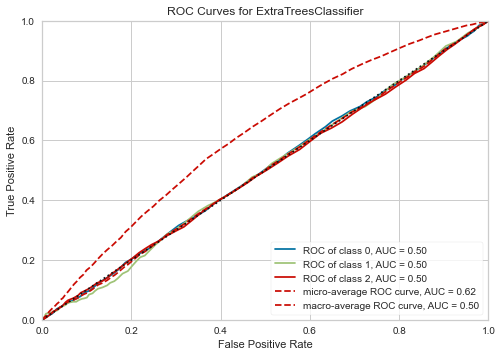

In [44]:
model_best = create_model(best,fold = 10)
plot_model(model_best)

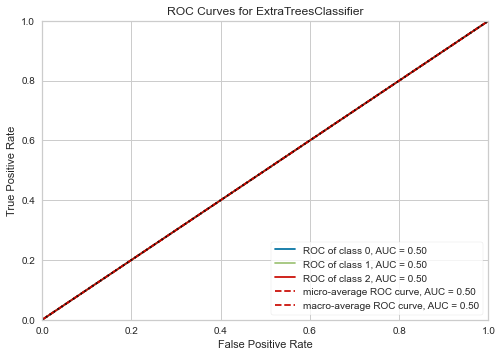

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced', criterion='gini',
                                       max_depth=7, max_features='log2',
                                       max_leaf_

In [12]:
tuned_model = tune_model(model_best, n_iter = 50)
allDone()
plot_model(tuned_model)
allDone()

save_model(tuned_model, 'tuned_model')
logs = get_logs(save=True)
allDone()

In [13]:
plot_model(tuned_model, plot = 'parameter')
allDone()
logs = get_logs(save=True)

allDone()

Parameters
bootstrap                     False
ccp_alpha                       0.0
class_weight               balanced
criterion                      gini
max_depth                         7
max_features                   log2
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.3
min_impurity_split             None
min_samples_leaf                  3
min_samples_split                 7
min_weight_fraction_leaf        0.0
n_estimators                     10
n_jobs                           -1
oob_score                     False
random_state                   5481
verbose                           0
warm_start                    False

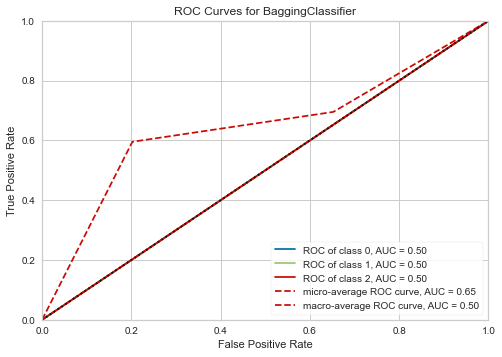

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=False, random_state=1055107916, verbose=0,
                     warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=Fals

(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                        min_impurity_split=None,
                                                                        min_samples_leaf=3,
                                                                        min_samples_s

In [14]:
# With Bagging
bagged_tuned_model = ensemble_model(tuned_model, method = 'Bagging', n_estimators = 10) # n_estimators = 100
allDone()
plot_model(bagged_tuned_model)
allDone()
print(bagged_tuned_model.estimators_)

save_model(bagged_tuned_model, 'bagged_tuned_model')
allDone()
logs = get_logs(save=True)

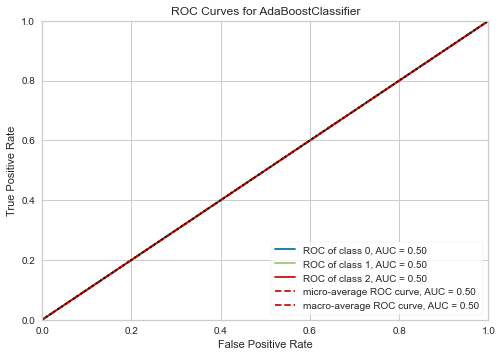

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=False, random_state=1555427058, verbose=0,
                     warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=7, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.3, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=Fals

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                         criterion='gini',
                                                                         max_depth=7,
                                                                         max_features='log2',
   

In [15]:
# With Boosting
boosted_tuned_model = ensemble_model(tuned_model, method = 'Boosting', n_estimators = 10) # n_estimators = 100
allDone()
plot_model(boosted_tuned_model)
allDone()
print(boosted_tuned_model.estimators_)
allDone()
logs = get_logs(save=True)

save_model(boosted_tuned_model, 'boosted_tuned_model')
allDone()
logs = get_logs(save=True)

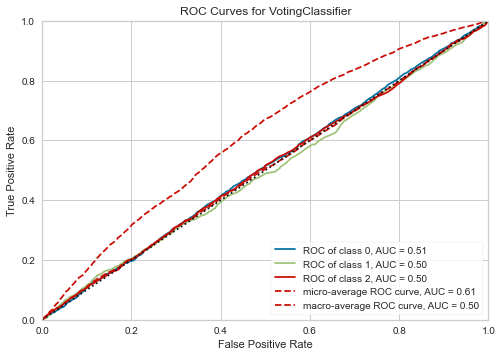

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5481, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=F

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=None,
        

In [16]:
# Blend Models
blender = blend_models(top3)
plot_model(blender)
allDone()
print(blender.estimators_)
allDone()

save_model(blender, 'blender')
allDone()
logs = get_logs(save=True)

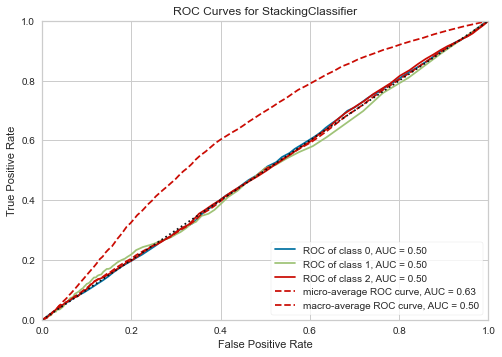

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5481, verbose=0,
                       warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5481, splitter='best')]


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                          max_depth=None,
                                                                          max_features='auto',
                                                                          max_leaf_nodes=

In [17]:
# Stack Model
stacker_top3 = stack_models(estimator_list = top3[1:], meta_model = top3[0], restack = True)
allDone()
plot_model(stacker_top3)
allDone()
print(stacker_top3.estimators_)
allDone()


save_model(stacker_top3, 'stacker_top3')
allDone()
logs = get_logs(save=True)

In [45]:
calibrated_tuned_model = calibrate_model(blender)
allDone()
logs = get_logs(save=True)

save_model(calibrated_tuned_model, 'calibrated_tuned_model')
logs = get_logs(save=True)
allDone()

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                                                             max_leaf_nodes=None,
                                                                                                             min_impurity_decrease=0.0,
        

In [23]:
calibrated_bagged_tuned_model = calibrate_model(bagged_tuned_model)
allDone()
logs = get_logs(save=True)

save_model(calibrated_tuned_model, 'calibrated_tuned_model')
logs = get_logs(save=True)
allDone()



Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                             max_features='log2',
                                                                             max_leaf_nodes=None,
                                                                             m

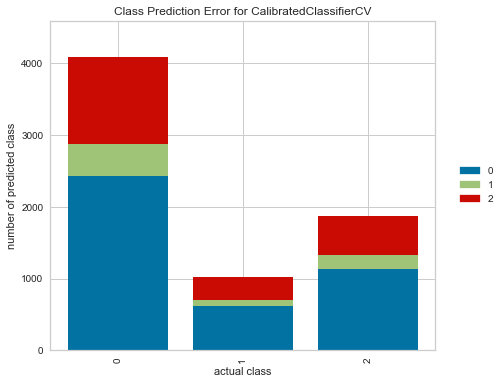

In [46]:
plot_model(calibrated_tuned_model, plot='error')

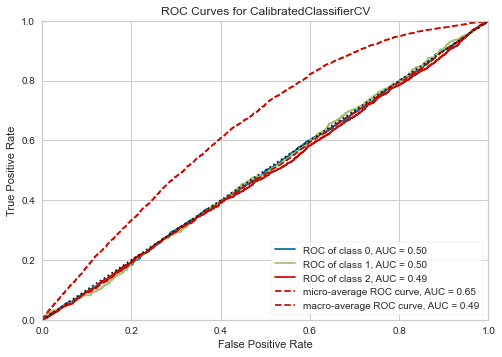

In [47]:
plot_model(calibrated_tuned_model)

In [49]:
pred_holdout_calibrated_tuned_model = predict_model(calibrated_tuned_model)  #, probability_threshold = 0.0754)
allDone()

save_model(pred_holdout_calibrated_tuned_model, 'pred_holdout_calibrated_tuned_model')
logs = get_logs(save=True)
allDone()

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
 1     -5.940000  16.16 -12.730000      0      0  0.5675
 2     45.560001  10.38 -16.570000      1      0  0.5751
 3     57.590000   7.64   0.500000      2      2  0.4430
 4     55.540001   6.21 -11.570000      0      0  0.4373
 ...         ...    ...        ...    ...    .

In [50]:
#%% Predict on your Unseen Data
data = albert.sample(frac=0.95, random_state=786)
data_unseen = albert.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
data_unseen

Data for Modeling: (9500, 4)
Unseen Data For Predictions (500, 4)


x1     x2     x3  target
0    34.86   7.86 -47.64       1
1    15.13   9.67 -37.22       1
2    18.28   3.85 -43.69       1
3     5.50  24.23 -45.81       1
4    76.97   8.30 -25.64       1
..     ...    ...    ...     ...
495   9.52   3.59 -19.32       2
496  24.00   5.25 -22.56       2
497  85.92   2.89  -4.30       2
498  22.87   4.84  -9.08       2
499  49.80  12.34   6.84       2

[500 rows x 4 columns]

In [53]:
predictions = predict_model(calibrated_tuned_model, data = data_unseen)

In [54]:
predictions

x1     x2     x3  target  Label   Score
0    34.86   7.86 -47.64       1      1  0.7990
1    15.13   9.67 -37.22       1      0  0.4600
2    18.28   3.85 -43.69       1      2  0.5647
3     5.50  24.23 -45.81       1      0  0.7732
4    76.97   8.30 -25.64       1      1  0.7929
..     ...    ...    ...     ...    ...     ...
495   9.52   3.59 -19.32       2      0  0.6942
496  24.00   5.25 -22.56       2      2  0.8180
497  85.92   2.89  -4.30       2      0  0.4576
498  22.87   4.84  -9.08       2      2  0.6863
499  49.80  12.34   6.84       2      2  0.4321

[500 rows x 6 columns]

In [55]:
predictions.describe().T

count       mean        std      min       25%       50%        75%  \
x1      500.0  43.345620  26.481380 -12.6100  20.64250  43.14000  65.105000   
x2      500.0   8.998780   5.219866   0.8400   4.96500   7.91000  11.582500   
x3      500.0 -24.919720  20.388537 -59.8900 -42.97750 -24.99500  -7.845000   
target  500.0   0.712000   0.895914   0.0000   0.00000   0.00000   2.000000   
Label   500.0   0.688000   0.876466   0.0000   0.00000   0.00000   2.000000   
Score   500.0   0.642825   0.135863   0.3448   0.53215   0.64895   0.771475   

            max  
x1      91.3900  
x2      28.1600  
x3       9.9900  
target   2.0000  
Label    2.0000  
Score    0.8449

In [56]:
predictions['Label'].value_counts()

0    294
2    138
1     68
Name: Label, dtype: int64

In [57]:
predictions['target'].value_counts()

0    293
2    149
1     58
Name: target, dtype: int64

In [58]:
# Boolean function for new column
def Check(predictions):
   if predictions['target']== predictions['Label']:
      return "True"
   else:
      return "False" 
# Result
predictions['result'] = predictions.apply(Check, axis=1)
predictions

predictions['result'].value_counts()

x1     x2     x3  target  Label   Score result
0    34.86   7.86 -47.64       1      1  0.7990   True
1    15.13   9.67 -37.22       1      0  0.4600  False
2    18.28   3.85 -43.69       1      2  0.5647  False
3     5.50  24.23 -45.81       1      0  0.7732  False
4    76.97   8.30 -25.64       1      1  0.7929   True
..     ...    ...    ...     ...    ...     ...    ...
495   9.52   3.59 -19.32       2      0  0.6942  False
496  24.00   5.25 -22.56       2      2  0.8180   True
497  85.92   2.89  -4.30       2      0  0.4576  False
498  22.87   4.84  -9.08       2      2  0.6863   True
499  49.80  12.34   6.84       2      2  0.4321   True

[500 rows x 7 columns]

True     308
False    192
Name: result, dtype: int64